<a href="https://colab.research.google.com/github/alfianyaqien/studuapps/blob/machine-learning/BANGKIT_FIX_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT LIBRARY

import os
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import tensorflow as tf
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn import model_selection


In [ ]:
# UPLOAD FILE
stunting = files.upload()

# New Section

In [ ]:
# SAVE FILE AS CSV

data = pd.read_csv('normal pendek.csv', delimiter=';')
print(data[113:1200])

      Jenis Kelamin  Umur (0-59 bulan)  Berat badan (kg)  Tinggi badan (cm)  \
113               0                 54             12.00              98.00   
114               0                 17              8.07              74.00   
115               1                 28             11.07              86.05   
116               0                 60              0.00             104.50   
117               1                  6              9.05              72.00   
...             ...                ...               ...                ...   
1195              0                 51             14.07              98.00   
1196              1                 49             14.00             102.00   
1197              0                 18             10.00              80.00   
1198              0                 51             16.00             102.00   
1199              0                 53             16.00              98.00   

      Label  
113       1  
114       1  
115      

In [ ]:
# Transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

Jenis Kelamin          int64
Umur (0-59 bulan)      int64
Berat badan (kg)     float64
Tinggi badan (cm)    float64
Label                  int64
dtype: object

In [ ]:
# CHECKING MISSING DATA IN VARIABEL UMUR
data['Umur (0-59 bulan)'].isnull().values.any()

False

In [ ]:
# CHECKING MISSING DATA IN VARIABEL BERAT BADAN
data['Berat badan (kg)'].isnull().values.any()

False

In [ ]:
# CHECKING MISSING DATA IN VARIABEL TINGGI BADAN
data['Tinggi badan (cm)'].isnull().values.any()

False

In [ ]:
# CHECKING MISSING DATA IN VARIABEL LABEL
data['Label'].isnull().values.any()

False

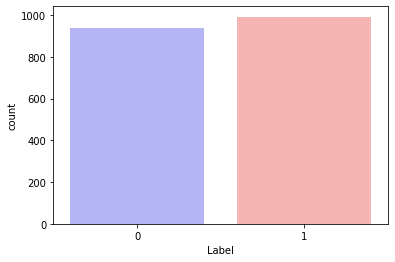

In [ ]:
# Data Exploration
# FOR LABEL
sns.countplot(x="Label", data=data, palette="bwr")
plt.show()

In [ ]:
# STATISTIC DESCRIPTIVE
data.describe()

,Jenis Kelamin,Umur (0-59 bulan),Berat badan (kg),Tinggi badan (cm),Label
count,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,0.551242,32.498447,10.473089,87.913328,0.513458
std,0.497496,15.970016,4.971486,12.462152,0.499948
min,0.000000,0.000000,0.000000,11.000000,0.000000
25%,0.000000,20.000000,8.600000,80.000000,0.000000
50%,1.000000,33.000000,11.250000,90.000000,1.000000
75%,1.000000,46.000000,13.900000,97.600000,1.000000
max,1.000000,60.000000,26.040000,118.000000,1.000000


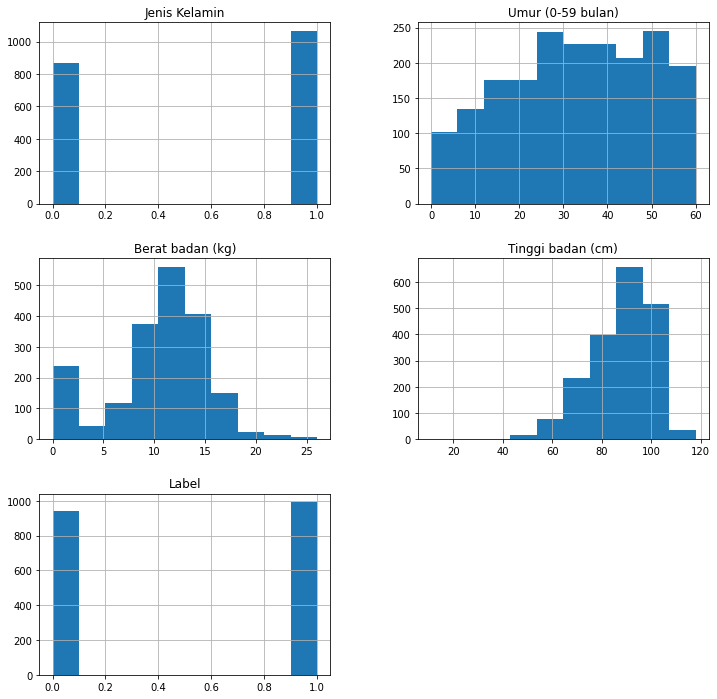

In [ ]:
# HISTOGRAM IN EACH VARIABLE
data.hist(figsize = (12, 12))
plt.show()

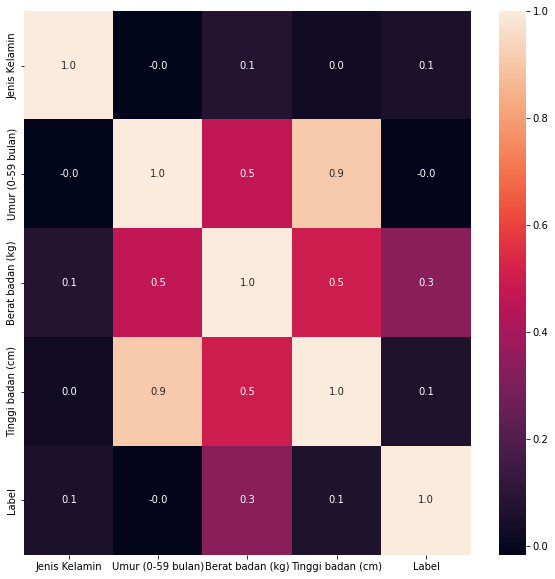

In [ ]:
# HEAT MAP
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

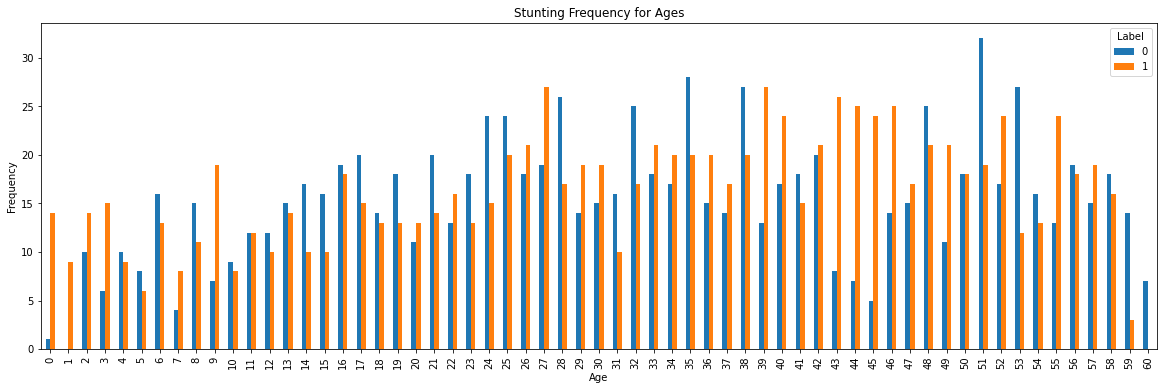

In [ ]:
pd.crosstab(data['Umur (0-59 bulan)'],data['Label']).plot(kind="bar",figsize=(20,6))
plt.title('Stunting Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

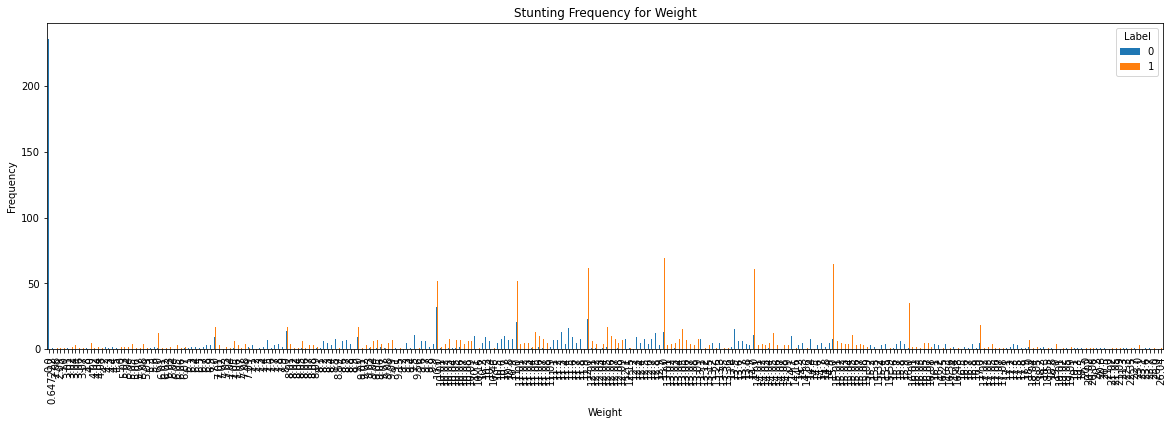

In [ ]:
pd.crosstab(data['Berat badan (kg)'],data['Label']).plot(kind="bar",figsize=(20,6))
plt.title('Stunting Frequency for Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(data['Tinggi badan (cm)'],data['Label']).plot(kind="bar",figsize=(20,6))
plt.title('Stunting Frequency for Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Create Training and Label Dataset
X = np.array(data.drop(['Label'], 1))
Y = np.array(data['Label'])

# NORMALIZE DATA X
X = (X - X.mean())/X.std()
X[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([-0.92836243,  0.42777624, -0.50315645,  1.86867358])

In [ ]:
# SPLIT DATA INTO DATA TRAINING AND DATA VALIDATION
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, stratify= Y, random_state=42, test_size = 0.1)

# convert the data to categorical labels
Y_train = to_categorical(Y_train, num_classes=None)
Y_val = to_categorical(Y_val, num_classes=None)
print (Y_train.shape)

# SPLIT DATA VALIDATION INTO DATA VALIDATION AND DATA TESTING
X_val, X_test, Y_val, Y_test = model_selection.train_test_split(X_val, Y_val, stratify = Y_val, random_state=42, test_size =0.2)
print(Y_val.shape)
print(Y_test.shape)

(1738, 2)
(155, 2)
(39, 2)


In [ ]:
print(X_val[0:50])

In [ ]:
#BUILDING MODEL
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128, input_dim=4, kernel_initializer='normal', kernel_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
                             tf.keras.layers.Dense(64, kernel_initializer='normal', activation='relu'),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Dense(32, kernel_initializer='normal', activation='relu'),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(2, activation='sigmoid')
]) 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 2)                 3

In [ ]:
# COMPILE MODEL
lr = 0.001
adam = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# TRAINING THE MODEL
history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=150, batch_size=25)

Epoch 1/150
70/70 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.5155 - val_loss: 0.6924 - val_accuracy: 0.5161
Epoch 2/150
70/70 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5104 - val_loss: 0.6893 - val_accuracy: 0.5161
Epoch 3/150
70/70 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5765 - val_loss: 0.6690 - val_accuracy: 0.5871
Epoch 4/150
70/70 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.5880 - val_loss: 0.6144 - val_accuracy: 0.7097
Epoch 5/150
70/70 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.6398 - val_loss: 0.5664 - val_accuracy: 0.7032
Epoch 6/150
70/70 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.6507 - val_loss: 0.5405 - val_accuracy: 0.7419
Epoch 7/150
70/70 [==============================] - 0s 3ms/step - loss: 0.5950 - accuracy: 0.6743 - val_loss: 0.5287 - val_accuracy: 0.7484
Epoch 8/150
7

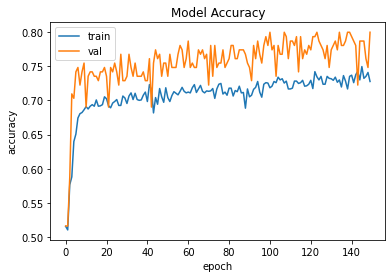

In [ ]:
# PLOT FOR MODEL ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

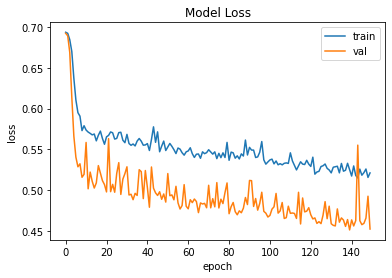

In [ ]:
# PLOT FOR MODEL LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# TESTING PREDICTION
prediksi = ([0,48,15.05,99]),
        

In [ ]:
# RESULT FOR PREDICTION
model.predict(prediksi)

array([[0.44242844, 0.54404366]], dtype=float32)

In [ ]:
# TESTING PREDICT
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
y_true = np.argmax(Y_test, axis = 1)
print(y_true)

[1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1
 0 1]
[1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1
 0 1]


In [ ]:
# MAKING CONFUSSION MATRIX

conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
print(conf_matrix)

[[11  8]
 [ 2 18]]


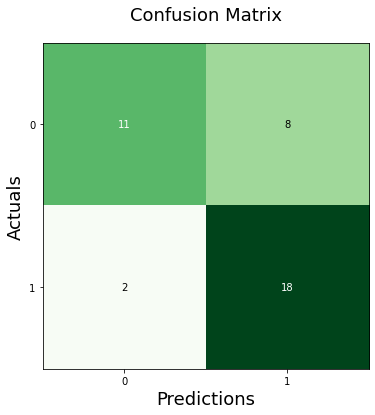

In [ ]:
# VISUALIZE CONFUSION MATRIX
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# CALCULATE AVERAGE PRECISION SCORE

predictions = model.predict(X_val)

average_precision_score(Y_val, predictions)

0.8327913333678372

In [ ]:
Y_val_true = np.argmax(Y_val, axis = 1)
print(Y_val_true)
predicts = np.argmax(predictions, axis = 1)
print(predicts)
report = classification_report(Y_val_true, predicts)
print(report)

[1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0
 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0]
[1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1
 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 0 1 1 1 1]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        75
           1       0.75      0.93      0.83        80

    accuracy                           0.80       155
   macro avg       0.82      0.80      0.80       155
weighted avg       0.82      0.80      0.80       155



In [ ]:
# Saving model
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("my_h5_model.h5")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_h5_model.h5")

# New Section